In [95]:
import pandas as pd
import numpy as np

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

### IMPORTING COMBINE FILE

In [97]:
dataset = pd.read_csv('C:\\Users\\npate\\Documents\\idp\\Web_scraping of Flipkart mobiles\\harshita2.csv')
dataset.head()

,Product_Name,Amazon_rate,FlipCartRate,price_diff,price_diff_perc
0,Apple iPhone XR,64900,49900,-15000,-30.060120
1,Apple iPhone XR,64900,57490,-7410,-12.889198
2,Comio C1 Pro,3490,3990,500,12.531328
3,Coolpad Cool 3,5420,5749,329,5.722734
4,Coolpad Cool 3,5420,7398,1978,26.736956


In [98]:
max_price = []
min_price = []
l = list()
for i, row in dataset.iterrows():
    if row['FlipCartRate'] < row['Amazon_rate']:
        max_price.append(row['Amazon_rate'])
        min_price.append(row['FlipCartRate'])
    else:
        max_price.append(row['FlipCartRate'])
        min_price.append(row['Amazon_rate'])

In [99]:
print()
print("If you only bought mobiles from Flipkart: {}".format(dataset['FlipCartRate'].sum()))

print()
print("If you only bought mobiles from Amazon: {}".format(dataset['Amazon_rate'].sum()))


If you only bought mobiles from Flipkart: 6025645

If you only bought mobiles from Amazon: 5650645


### max and min price with probability density

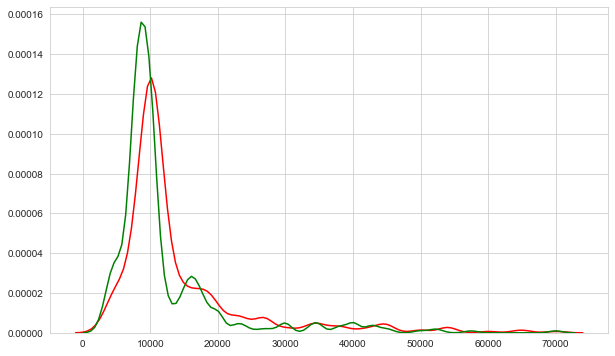

In [100]:
plt.figure(figsize=(10, 6))
sns.kdeplot(max_price, color='red')
sns.kdeplot(min_price, color='green')

In [101]:
print("Price Worst Case Scenario: {}".format(sum(max_price)))
print("Price Best Case Scenario: {}".format(sum(min_price)))

print()
diff = sum(max_price) - sum(min_price)
print("Difference: {}".format(diff))
print("Percentage difference: {0:.2f}%".format(diff/sum(max_price)*100))

Price Worst Case Scenario: 6309562
Price Best Case Scenario: 5366728

Difference: 942834
Percentage difference: 14.94%


### Price Difference Plots

Text(0.5, 0, 'Price Difference (Percentage)')

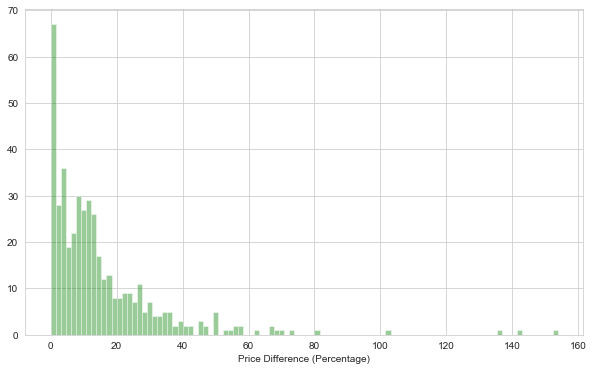

In [102]:
plt.figure(figsize=(10, 6))
sns.distplot(abs(dataset['price_diff_perc']), kde=False, color='green', bins=100)
plt.xlabel('Price Difference (Percentage)')

In [103]:
no_diff = dataset[dataset['price_diff'] == 0].count()[0]/dataset.shape[0]
print('Percentage of mobiles which are priced the same: {0:.2f}%'.format(no_diff*100))

print()
no_diff = dataset[(abs(dataset['price_diff_perc']) > 0) & (abs(dataset['price_diff_perc']) < 100)].count()[0]/dataset.shape[0]
print('Percentage of mobiles with price difference: {0:.2f}%'.format(no_diff*100))

print()
no_diff = dataset[dataset['price_diff_perc'] < 0].count()[0]/dataset.shape[0]
print('Better pricing on Flipkart: {0:.2f}%'.format(no_diff*100))

print()
no_diff = dataset[dataset['price_diff_perc'] > 0].count()[0]/dataset.shape[0]
print('Better pricing on Amazon: {0:.2f}%'.format(no_diff*100))

Percentage of mobiles which are priced the same: 6.76%

Percentage of mobiles with price difference: 92.34%

Better pricing on Flipkart: 38.74%

Better pricing on Amazon: 54.50%


In [104]:
print("Only Flipkart: {0:.2f}%".format((100*(dataset.FlipCartRate.sum() - sum(min_price))/sum(min_price))))
print()
print("Only Amazon: {0:.2f}%".format((100*(dataset.Amazon_rate.sum() - sum(min_price))/sum(min_price))))

Only Flipkart: 12.28%

Only Amazon: 5.29%


### Histogram of price difference percentage

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(dataset['price_diff_perc'], kde=False, color='green')
plt.xlabel('Price Difference (Percentage)')
plt.ylabel('Number of mobiles')

### Mobile phone less than 35000 price

Text(0, 0.5, 'Number of mobiles')

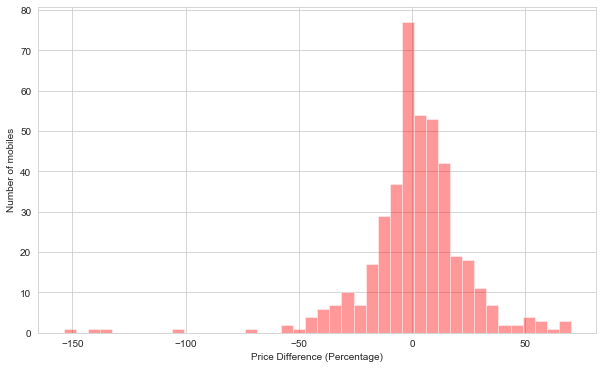

In [94]:
plt.figure(figsize=(10, 6))
sns.distplot(dataset[dataset['FlipCartRate'] <35000 ]['price_diff_perc'], kde=False, color='red')
plt.xlabel('Price Difference (Percentage)')
plt.ylabel('Number of mobiles')

### Mobile phone greater than 35000 price 

Text(0, 0.5, 'Number of books')

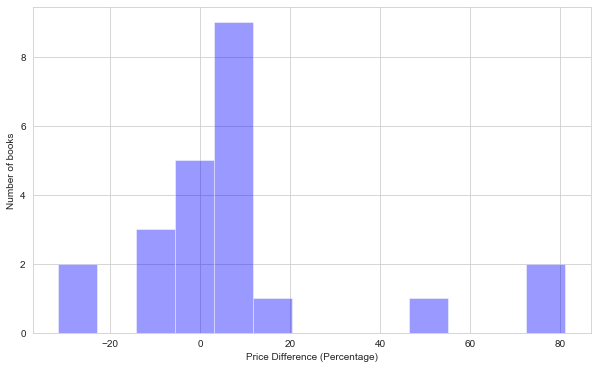

In [83]:
plt.figure(figsize=(10, 6))
sns.distplot(dataset[dataset['FlipCartRate'] > 35000]['price_diff_perc'], kde=False, color='blue')
plt.xlabel('Price Difference (Percentage)')
plt.ylabel('Number of books')